In [ ]:
! pip install -q kaggle

creating kaggle directory

In [ ]:
!mkdir ~/.kaggle

copying json file to folder

In [ ]:
!cp kaggle.json ~/.kaggle

from kaggle dataset field, copy the api command

In [17]:
!kaggle datasets download -d harshsangrulkar/50-startups

  0% 0.00/1.37k [00:00<?, ?B/s]
100% 1.37k/1.37k [00:00<00:00, 3.02MB/s]


In [18]:
!unzip /content/50-startups.zip

Archive:  /content/50-startups.zip
  inflating: 50_Startups.csv         


trying with an image API command

In [ ]:
#!kaggle datasets download -d puneet6060/intel-image-classification

In [ ]:
#!unzip /content/intel-image-classification.zip

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("/content/50-startups.zip")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [21]:
df.shape

(108, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [24]:
df['State'].value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [25]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['State'] = le.fit_transform(df['State'])

In [28]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [29]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241379,0.725978,0.056264,0.964770
Administration,0.241379,1.000000,-0.024699,0.039406,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.055431,0.748957
State,0.056264,0.039406,0.055431,1.000000,0.061662
Profit,0.964770,0.198849,0.748957,0.061662,1.000000


In [30]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,1.027778,113523.760000
std,44996.368152,27322.385654,117937.942120,0.836753,38991.013654
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,0.000000,90708.190000
50%,75791.365000,122699.795000,239452.750000,1.000000,109543.120000
75%,101913.080000,145077.580000,298664.470000,2.000000,141585.520000
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


<Axes: >

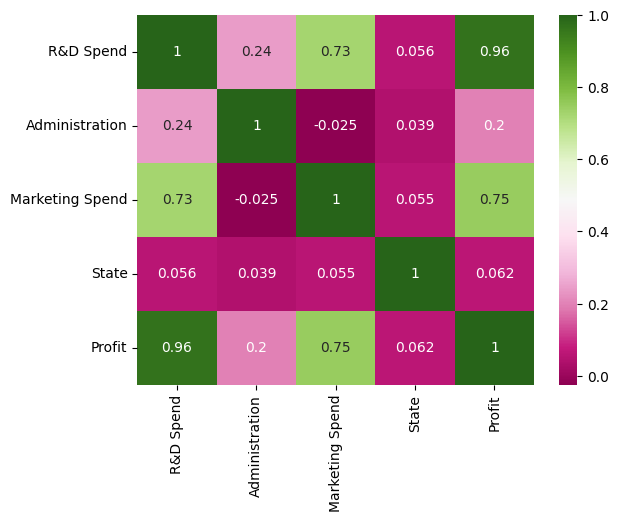

In [31]:
sns.heatmap(df.corr(), annot=True, cmap="PiYG")

X and Y split

In [32]:
X = df.drop(columns=['Profit'], axis=1)

In [33]:
Y = df['Profit']

In [34]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [35]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

scaling data

In [36]:
x_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
x_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=0)

In [40]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((86, 4), (22, 4), (86,), (22,))

Model Building

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [42]:
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(x_test)
y_pred

array([ 48379.24868386, 134848.9192467 ,  76483.10965225, 181561.78529188,
       112966.00035112, 134241.68257226, 129222.38731942, 160017.05919784,
       116752.96050775,  46260.9926407 , 102266.36060189, 115568.27177598,
        48379.24868386, 119114.16525526,  88602.22002789, 127101.40273623,
       127101.40273623,  90942.33421515,  58677.7334991 , 146304.26215166,
       149410.05441   , 152502.87810448])

Evaluating Model

In [45]:
from sklearn.metrics import r2_score

In [46]:
acc = r2_score(y_test, y_pred)
acc

0.9258962347553817

testing with random variable

In [50]:
rand_pred = lr.predict([[0.87,0.76,0.44,0.5]])
rand_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([166389.7210885])

In [49]:
print("profit for random variable is {}".format(rand_pred))

profit for random variable is [166389.7210885]


import pickle library where we can dump our model

In [51]:
import pickle

In [52]:
pickle.dump(lr, open('startup.pkl','wb'))